# Statistical Analysis of Electoral Patterns in Indian Democracy (1977–2015)


In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_vidhan=pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/ind-vidhan-sabha.csv')
df_lok=pd.read_csv('https://samatrix-data.s3.ap-south-1.amazonaws.com/Statistics-Project/ind-lok-sabha.csv')

In [4]:
df_vidhan.shape

(327294, 11)

In [5]:
df_vidhan.columns

Index(['st_name', 'year', 'ac_no', 'ac_name', 'ac_type', 'cand_name',
       'cand_sex', 'partyname', 'partyabbre', 'totvotpoll', 'electors'],
      dtype='object')

In [6]:
df_lok.shape

(73081, 11)

In [7]:
df_lok.columns

Index(['st_name', 'year', 'pc_no', 'pc_name', 'pc_type', 'cand_name',
       'cand_sex', 'partyname', 'partyabbre', 'totvotpoll', 'electors'],
      dtype='object')

In [ ]:
df_vidhan.isnull().sum()

,0
st_name,0
year,0
ac_no,0
ac_name,16083
ac_type,0
cand_name,0
cand_sex,5302
partyname,0
partyabbre,2706
totvotpoll,7


In [ ]:
df_lok['cand_sex'].value_counts()

,count
cand_sex,
M,68885
F,3648
O,6


In [ ]:
# Step 1: Create mapping from existing data (most frequent abbrev per partyname)
valid_pairs = df_vidhan.dropna(subset=['partyname', 'partyabbre'])

party_abbrev_map = (
    valid_pairs.groupby('partyname')['partyabbre']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

# Step 2: Fill missing partyabbre using the mapping
df_vidhan['partyabbre'] = df_vidhan.apply(
    lambda row: party_abbrev_map.get(row['partyname'], row['partyabbre']),
    axis=1
)

# Step 3: Fill any still-missing values with 'IND'
df_vidhan['partyabbre'] = df_vidhan['partyabbre'].fillna('IND')


In [ ]:
df_vidhan['partyabbre'].value_counts().head(50)

,count
partyabbre,
IND,163687
INC,27363
BJP,20053
BSP,13076
JNP,6779
SP,5137
JD,4723
CPI,4045
CPM,3977


In [ ]:
df_vidhan['partyabbre'] = df_vidhan['partyabbre'].replace({
    'INC(I)': 'INC'
})

In [ ]:
df_vidhan['partyabbre'].value_counts().head(10).sort_index()

,count
partyabbre,
BJP,20053
BSP,13076
CPI,4045
CPM,3977
DDP,3620
INC,30391
IND,163687
JD,4723
JNP,6779


In [ ]:
df_lok['partyabbre' ] = df_lok['partyabbre' ].replace({
'INC(I)': 'INC'})

In [ ]:
#convert year to integer
df_vidhan['year'] = df_vidhan['year'].astype(int)

#fill missing value og gender as U
df_vidhan['cand_sex'] = df_vidhan['cand_sex'].fillna('U')

#drop the missing value of total vote polled
df_vidhan = df_vidhan.dropna(subset= ['totvotpoll'])

In [ ]:
## Drop rows where ac_name is missing for mapping
valid_acname = df_vidhan.dropna(subset=['ac_name'])

#create mapping
ac_name_map = (
    df_vidhan[~df_vidhan['ac_name'].isna()]
    .groupby(['st_name', 'ac_no'])['ac_name']
    .agg(lambda x: x.value_counts().idxmax())
)

def fill_ac_name(row):
    if pd.isna(row['ac_name']):
        return ac_name_map.get((row['st_name'], row['ac_no']), np.nan)
    return row['ac_name']

# Apply the mapping to fill missing ac_name values
df_vidhan['ac_name'] = df_vidhan.apply(fill_ac_name, axis=1)

#counting how many ac_name values are stilling missing
print("Missing ac_name afer fill:", df_vidhan['ac_name'].isna().sum())

Missing ac_name afer fill: 0


In [ ]:
df_vidhan.isnull().sum()

,0
st_name,0
year,0
ac_no,0
ac_name,0
ac_type,0
cand_name,0
cand_sex,0
partyname,0
partyabbre,0
totvotpoll,0


In [ ]:
df_lok.shape

(73081, 11)

In [ ]:
df_lok.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


In [ ]:
df_lok.isnull().sum()

,0
st_name,0
year,0
pc_no,0
pc_name,0
pc_type,8070
cand_name,0
cand_sex,542
partyname,0
partyabbre,0
totvotpoll,0


In [ ]:
#Handling missing value of lok sabha
df_lok['cand_sex'] = df_lok['cand_sex'].fillna('U')

#filling na values
if 'pc_type' in df_vidhan.columns:
    df_vidhan['pc_type'] = df_vidhan['pc_type'].fillna('Unknown')

#checking missing values
missing_summary = df_vidhan.isnull().sum()
print("Missing values after filling:\n", missing_summary)

Missing values after filling:
 st_name       0
year          0
ac_no         0
ac_name       0
ac_type       0
cand_name     0
cand_sex      0
partyname     0
partyabbre    0
totvotpoll    0
electors      0
dtype: int64


In [ ]:
df_lok['partyabbre'] = df_lok['partyabbre'].replace("INC(I)", "INC")
df_lok['partyabbre']

,partyabbre
0,IND
1,INC
2,IND
3,IND
4,IND
...,...
73076,NOTA
73077,INC
73078,BJP
73079,CPM


In [ ]:
#Unique Counts
print("Unique Counts:")
print("Unique States:", df_vidhan['st_name'].nunique())
print("Years Covered:", df_vidhan ['year'].nunique())
print("Unique Constituencies:", df_vidhan['ac_no'].nunique())
print("Unique Candidates", df_vidhan ['cand_name'].nunique())
print("Unique Parties:", df_vidhan ['partyabbre'].nunique())

Unique Counts:
Unique States: 30
Years Covered: 36
Unique Constituencies: 425
Unique Candidates 220529
Unique Parties: 1248


  Gender   Count
0      M  307091
1      F   14883
2      U    5302
3      O      11


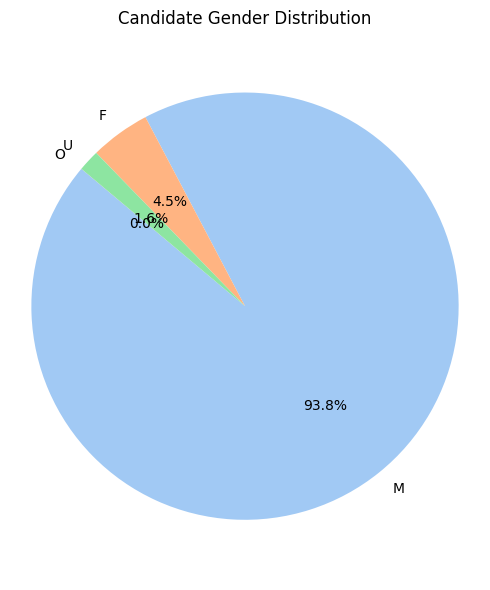

In [ ]:
# Prepare gender distribution data
gender_counts = df_vidhan['cand_sex'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
print(gender_counts)

# Pie Chart
plt.figure(figsize=(5, 6))
plt.pie(
    gender_counts['Count'],
    labels=gender_counts['Gender'],  # Fixed: 'Labels-gender_counts "Gender"' → proper syntax
    autopct='%1.1f%%',               # Fixed: '%1.14%%' → '%1.1f%%'
    startangle=140,
    colors=sns.color_palette('pastel')
)

plt.title("Candidate Gender Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is a circle
plt.tight_layout()
plt.show()


    Year  Avg_Candidates_per_Seat
0   1977                36.708235
1   1978                19.384354
2   1979                12.312500
3   1980                39.305882
4   1982                11.676871
5   1983                15.200680
6   1984                 7.470085
7   1985                57.840000
8   1987                16.122449
9   1989                30.978824
10  1990                65.114198
11  1991                40.286396
12  1992                 4.931624
13  1993                41.716981
14  1994                20.061224
15  1995                53.206790
16  1996                39.681604
17  1997                 5.905983
18  1998                20.215625
19  1999                19.472789
20  2000                17.783951
21  2001                17.428571
22  2002                20.193548
23  2003                25.743478
24  2004                24.972789
25  2005                29.246914
26  2006                20.928571
27  2007                24.866005
28  2008      

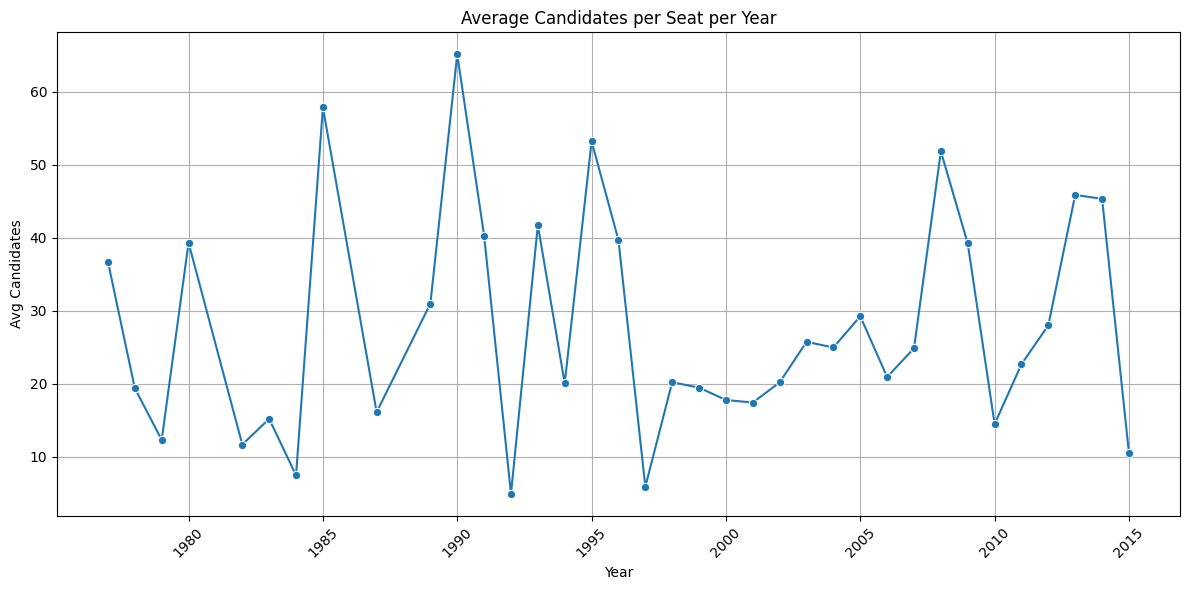

In [ ]:
# Step 1: Average candidates per seat per year
candidates_per_seat = df_vidhan.groupby(['year', 'ac_no'])['cand_name'].nunique()
avg_candidates_per_seat = candidates_per_seat.groupby('year').mean().reset_index()
avg_candidates_per_seat.columns = ['Year', 'Avg_Candidates_per_Seat']
print(avg_candidates_per_seat)

# Step 2: Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_candidates_per_seat, x='Year', y='Avg_Candidates_per_Seat', marker='o')
plt.title('Average Candidates per Seat per Year')
plt.ylabel('Avg Candidates')
plt.xlabel('Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


    year  totvotpoll   electors  voter_turnout_percent
0   1977  59107891.0  226166275                  26.13
1   1978  27708972.0   85753182                  32.31
2   1979     94133.0     359101                  26.21
3   1980  64915667.0  258603200                  25.10
4   1982  20187665.0   52422974                  38.51
5   1983  21296499.0   66063231                  32.24
6   1984  12232502.0   31523449                  38.80
7   1985  86255868.0  312198536                  27.63
8   1987  25323833.0   63872512                  39.65
9   1989  49919785.0  186678633                  26.74
10  1990  57125442.0  213268107                  26.79
11  1991  57289242.0  203190207                  28.19
12  1992   1416408.0   13171851                  10.75
13  1993  41990796.0  167611922                  25.05
14  1994  25693484.0   75778249                  33.91
15  1995  46243622.0  164492560                  28.11
16  1996  71148520.0  237706787                  29.93
17  1997  

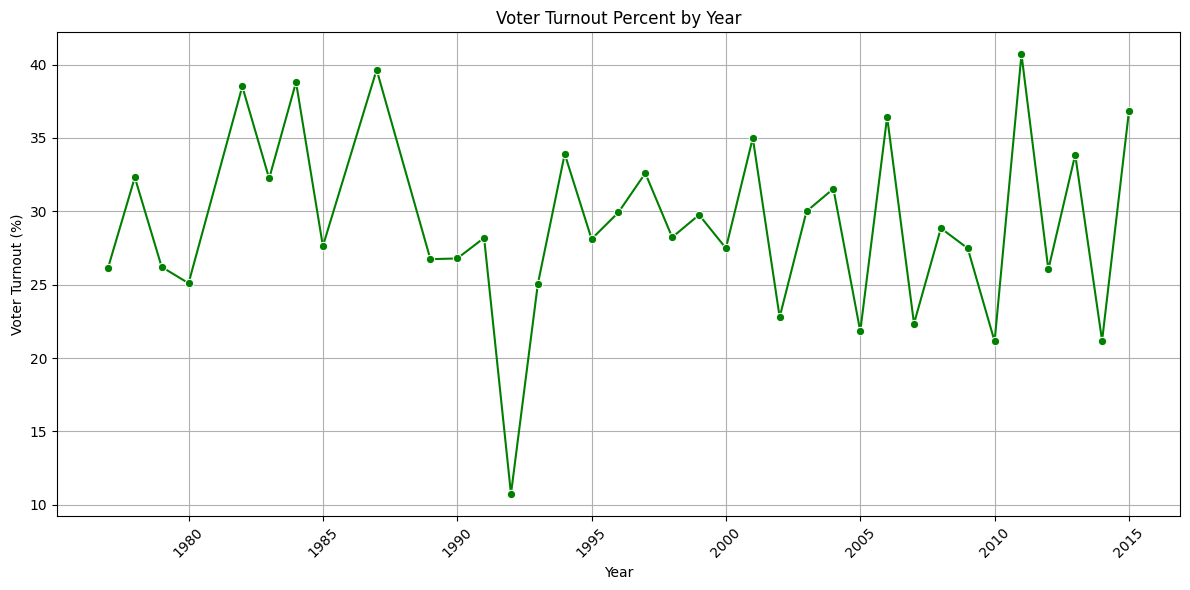

In [ ]:
# Step 1: Get one row per seat per year (constituency level)
constituency_turnout = (
    df_vidhan.groupby(['year', 'st_name', 'ac_no'])[['totvotpoll', 'electors']]
    .agg({'totvotpoll': 'max', 'electors': 'max'})  # or use 'mean' if data is messy
    .reset_index()
)
# Step 2: Aggregate to year-level totals
yearly_turnout = constituency_turnout.groupby('year')[['totvotpoll', 'electors']].sum().reset_index()

# Step 3: Compute voter turnout percentage
yearly_turnout['voter_turnout_percent'] = (yearly_turnout['totvotpoll'] / yearly_turnout['electors']) * 100

# Optional: Round for clean output
yearly_turnout['voter_turnout_percent'] = yearly_turnout['voter_turnout_percent'].round(2)

# Print result
print(yearly_turnout)

# Step 4: Plot the corrected turnout
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_turnout, x='year', y='voter_turnout_percent', marker='o', color='green')
plt.title('Voter Turnout Percent by Year')
plt.ylabel('Voter Turnout (%)')
plt.xlabel('Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

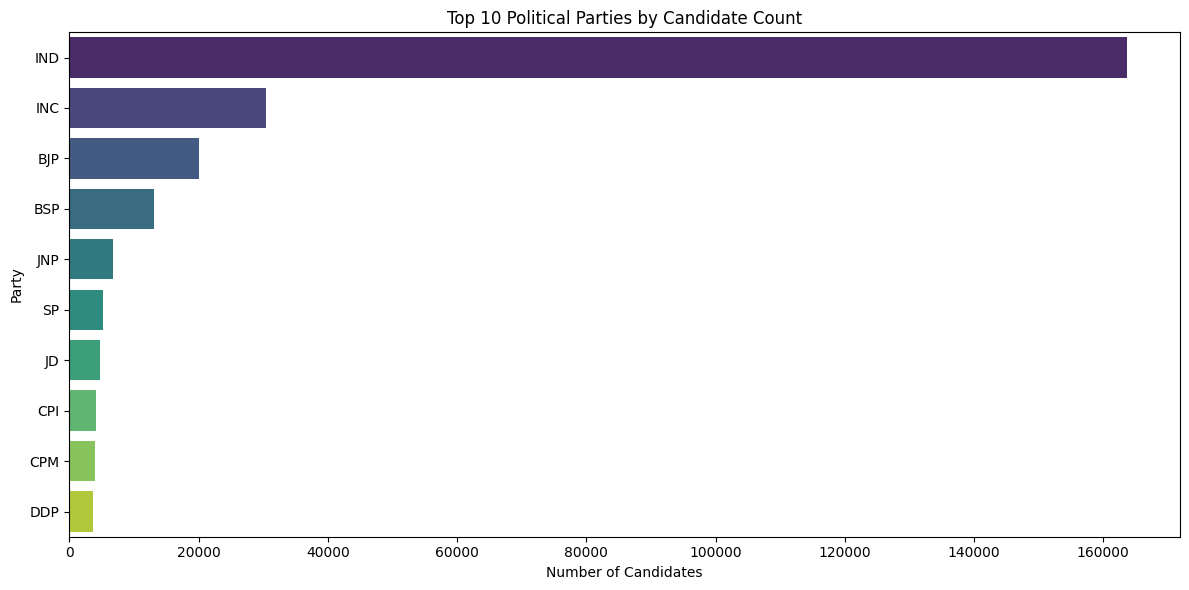

In [ ]:
#step 1: count nuber of candidate
party_counts=df_vidhan['partyabbre'].value_counts().nlargest(10).reset_index()
party_counts.columns=['Party','Candidate_Count']

plt.figure(figsize=(12,6))
sns.barplot(
    data=party_counts,
    x='Candidate_Count',
    y='Party',
    hue='Party',
    dodge=False,
    palette='viridis',
    legend=False
)
plt.title('Top 10 Political Parties by Candidate Count')
plt.xlabel('Number of Candidates')
plt.ylabel('Party')
plt.tight_layout()
plt.show()

In [ ]:
winners_df=df_vidhan.loc[df_vidhan.groupby(['year','st_name','ac_no'])['totvotpoll'].idxmax()]
print(winners_df[winners_df['st_name']=='Uttarakhand'][['st_name','year','ac_name','cand_name','partyabbre','totvotpoll']].sort_values(by='year',ascending=False).head(10))

            st_name  year     ac_name                     cand_name  \
313845  Uttarakhand  2012  Kaladhungi             Banshidhar Bhagat   
313859  Uttarakhand  2012    Ramnagar                  Amrita Rawat   
313871  Uttarakhand  2012      Jaspur  Dr. Shailendra Mohan Singhal   
313885  Uttarakhand  2012    Kashipur        Harbhajan Singh Cheema   
313892  Uttarakhand  2012      Bajpur                  Yashpal Arya   
313216  Uttarakhand  2012     Tharali                   Dr Jeet Ram   
313227  Uttarakhand  2012  Karnprayag        Ansuya Prasad Maikhuri   
313202  Uttarakhand  2012   Badrinath        Rajendra Singh Bhandri   
313193  Uttarakhand  2012    Gangotri         Vijaipal Singh Sajwan   
313183  Uttarakhand  2012   Yamunotri           Pritam Singh Panwar   

       partyabbre  totvotpoll  
313845        BJP     22744.0  
313859        INC     23851.0  
313871        INC     25533.0  
313885        BJP     31734.0  
313892        INC     38524.0  
313216        INC     1740

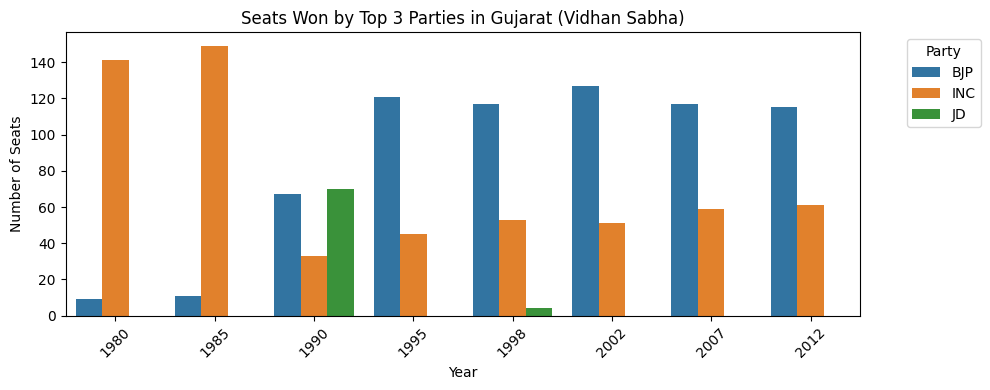

In [ ]:
# 1. Filter winners from Gujarat
winners_gujarat = winners_df[winners_df['st_name'] == 'Gujarat'].copy()

# 2. Find top 3 parties in Gujarat by total seats won
top_3_parties = winners_gujarat['partyabbre'].value_counts().nlargest(3).index.tolist()

# 3. Filter to only those top 3 parties
winners_gujarat_top3 = winners_gujarat[winners_gujarat['partyabbre'].isin(top_3_parties)]

# 4. Seats won per year by party
party_seats_year = (
    winners_gujarat_top3.groupby(['year', 'partyabbre']).size()
    .reset_index(name='seats')
)

# 5. Plot: Seats Won
plt.figure(figsize=(10, 4))
sns.barplot(data=party_seats_year, x='year', y='seats', hue='partyabbre')

plt.title('Seats Won by Top 3 Parties in Gujarat (Vidhan Sabha)')
plt.ylabel('Number of Seats')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Total votes per party
party_votes = df_vidhan.groupby('partyabbre')['totvotpoll'].sum()

# Total votes overall
total_votes = df_vidhan['totvotpoll'].sum()

# Vote share as percentage
vote_share = (party_votes / total_votes) * 100
vote_share = vote_share.round(2)


In [ ]:
# Get winning candidate per constituency
winners = df_vidhan.sort_values('totvotpoll', ascending=False).drop_duplicates(subset=['year', 'st_name', 'ac_no'])

# Count seats won by each party
party_seats = winners['partyabbre'].value_counts()

# Total seats
total_seats = winners.shape[0]

# Seat share as percentage
seat_share = (party_seats / total_seats) * 100
seat_share = seat_share.round(2)


In [ ]:
# Combine into a DataFrame
summary_df = pd.DataFrame({
    'Vote Share (%)': vote_share,
    'Seat Share (%)': seat_share
}).fillna(0)

# Sort by vote share
summary_df = summary_df.sort_values('Vote Share (%)', ascending=False)


In [ ]:
top_10 = summary_df.head(10)

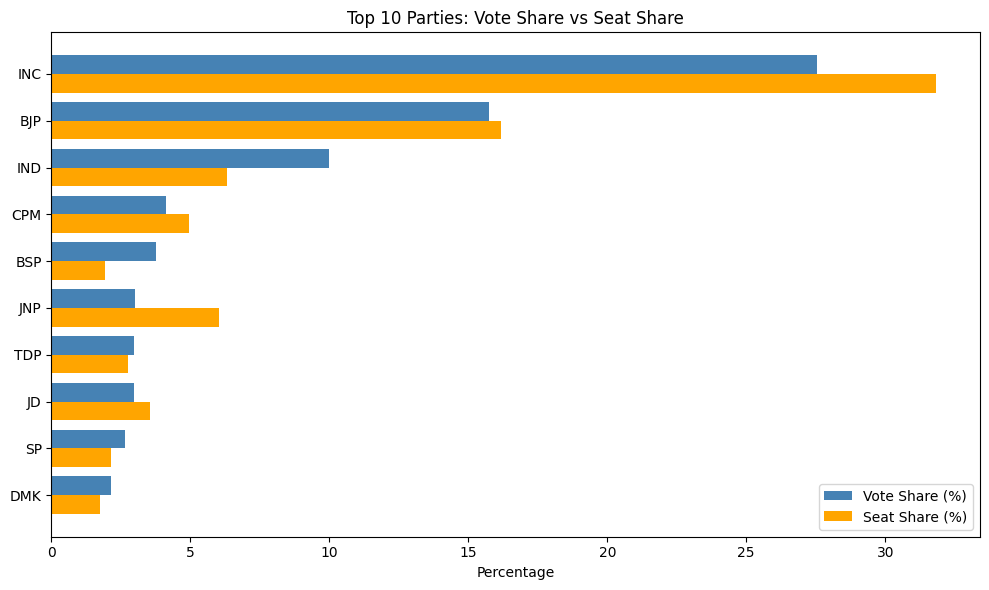

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Horizontal bar plot
bar_width = 0.4
y_pos = range(len(top_10))

plt.barh(y_pos, top_10['Vote Share (%)'], height=bar_width, label='Vote Share (%)', color='steelblue')
plt.barh([p + bar_width for p in y_pos], top_10['Seat Share (%)'], height=bar_width, label='Seat Share (%)', color='orange')

# Y-axis labels and ticks
plt.yticks([p + bar_width/2 for p in y_pos], top_10.index)
plt.xlabel("Percentage")
plt.title("Top 10 Parties: Vote Share vs Seat Share")
plt.legend()
plt.tight_layout()
plt.gca().invert_yaxis()  # Highest vote share on top

plt.show()


In [ ]:
# Get winning candidate per constituency
winners = df_vidhan.sort_values('totvotpoll', ascending=False).drop_duplicates(subset=['year', 'st_name', 'ac_no'])

# Count seats won by each party
party_seats = winners['partyabbre'].value_counts()

# Total seats
total_seats = winners.shape[0]

# Seat share as percentage
seat_share = (party_seats / total_seats) * 100
seat_share = seat_share.round(2)


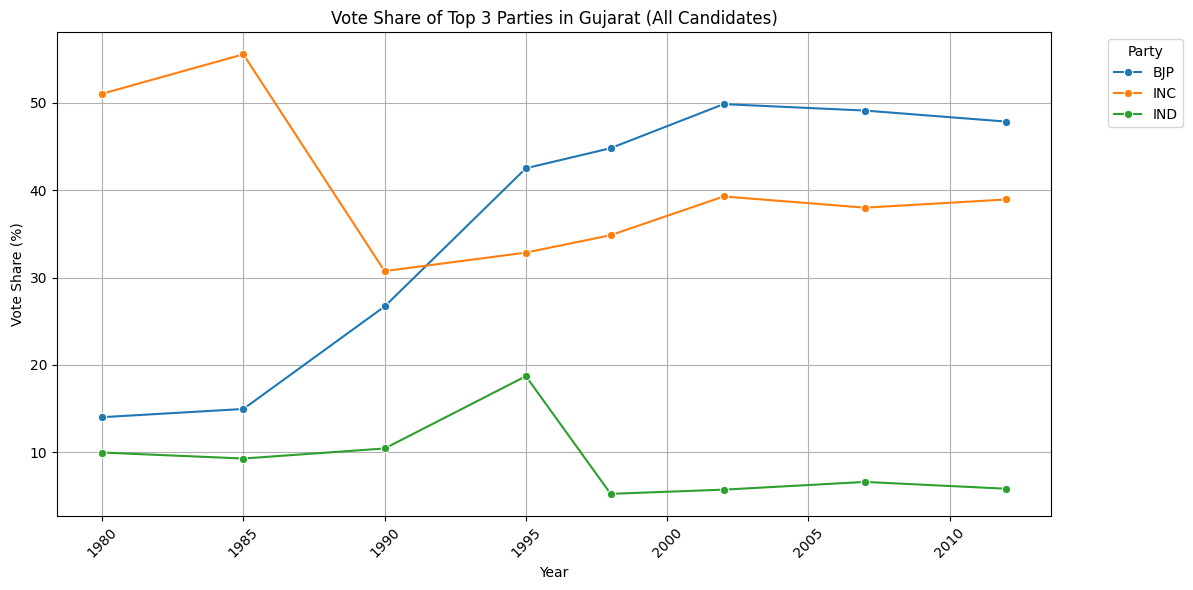

In [ ]:
# Party Vote Share Trend (Gujarat)

# Step 1: Filter Gujarat data
gujarat_df = df_vidhan[df_vidhan['st_name'] == 'Gujarat'].copy()

# Step 2: Total votes polled per party per year (including all candidates)
party_votes = (
    gujarat_df.groupby(['year', 'partyabbre'])['totvotpoll']
    .sum()
    .reset_index()
)

# Step 3: Total votes polled overall per year
total_votes_per_year = (
    gujarat_df.groupby('year')['totvotpoll']
    .sum()
    .reset_index()
    .rename(columns={'totvotpoll': 'total_votes'})
)

# Step 4: Merge and compute vote share
party_vote_share = pd.merge(party_votes, total_votes_per_year, on='year')
party_vote_share['vote_share_percent'] = (party_vote_share['totvotpoll'] / party_vote_share['total_votes']) * 100

# Step 5 (continued): Identify top 3 parties by total votes in Gujarat
top_parties = (
    gujarat_df.groupby('partyabbre')['totvotpoll']
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index.tolist()
)

# Step 6: Filter only top 3 parties
top_vote_share = party_vote_share[party_vote_share['partyabbre'].isin(top_parties)]

# Step 7: Plot vote share trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=top_vote_share,
    x='year',
    y='vote_share_percent',
    hue='partyabbre',
    marker='o'
)

plt.title('Vote Share of Top 3 Parties in Gujarat (All Candidates)')
plt.xlabel('Year')
plt.ylabel('Vote Share (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

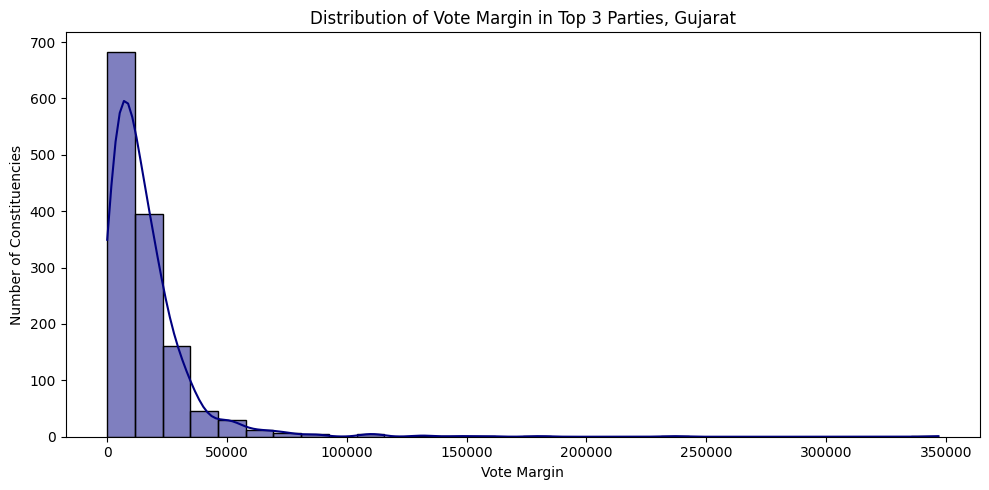

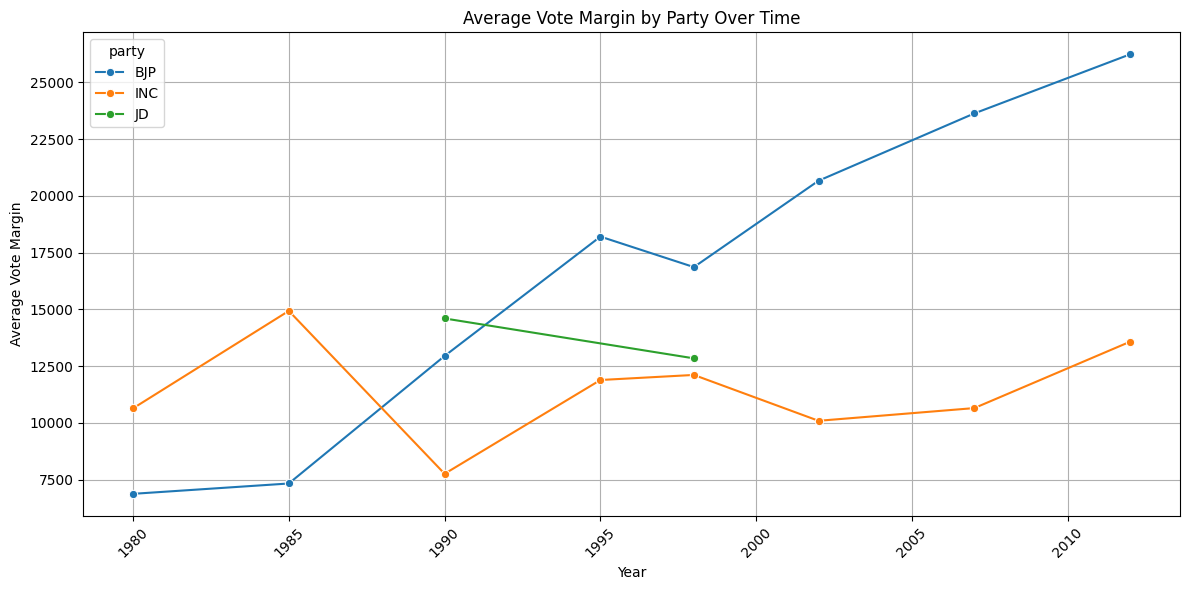

In [ ]:
# 1. Compute vote share
df_vidhan['vote_share_percent'] = (df_vidhan['totvotpoll'] / df_vidhan['electors']) * 100

# 2. Filter Gujarat data
gujarat_df = df_vidhan[df_vidhan['st_name'] == 'Gujarat'].copy()

# 3. Rank candidates per seat/year
gujarat_df['rank'] = gujarat_df.groupby(['year', 'ac_no'])['totvotpoll'].rank(method='first', ascending=False)

# 4. Get winners and runners-up
winners = gujarat_df[gujarat_df['rank'] == 1].copy()
runners_up = gujarat_df[gujarat_df['rank'] == 2].copy()

# 5. Merge winners and runners-up
merged = pd.merge(
    winners, runners_up,
    on=['year', 'ac_no'],
    suffixes=('_winner', '_runner_up')
)

# 6. Calculate vote margin
merged['vote_margin'] = merged['totvotpoll_winner'] - merged['totvotpoll_runner_up']

# 7. Top 3 parties
top_3_parties = winners['partyabbre'].value_counts().nlargest(3).index.tolist()

# 8. Filter for top 3 parties only
merged_top3 = merged[merged['partyabbre_winner'].isin(top_3_parties)].copy()

# 9. Plot vote margin distribution
plt.figure(figsize=(10, 5))
sns.histplot(merged_top3['vote_margin'], bins=30, kde=True, color='navy')
plt.title('Distribution of Vote Margin in Top 3 Parties, Gujarat')
plt.xlabel('Vote Margin')
plt.ylabel('Number of Constituencies')
plt.tight_layout()
plt.show()

# 10. Average margin per year per party
avg_margin_year_party = (
    merged_top3
    .groupby(['year', 'partyabbre_winner'])['vote_margin']
    .mean()
    .reset_index()
    .rename(columns={'partyabbre_winner': 'party'})
)

# 11. Line plot of average margin
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_margin_year_party, x='year', y='vote_margin', hue='party', marker='o')
plt.title('Average Vote Margin by Party Over Time')
plt.xlabel('Year')
plt.ylabel('Average Vote Margin')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Outliers
q1=avg_margin_year_party['vote_margin'].quantile(0.25)
q3=avg_margin_year_party['vote_margin'].quantile(0.75)
outliers=avg_margin_year_party[(avg_margin_year_party['vote_margin']<q1) | (avg_margin_year_party['vote_margin']>q3)]
print("Outliers Years in Vote Margin Trends (Top 3 Parties)")
print(outliers.sort_values(by='vote_margin',ascending=False))

Outliers Years in Vote Margin Trends (Top 3 Parties)
    year party   vote_margin
16  2012   BJP  26236.504348
14  2007   BJP  23632.948718
12  2002   BJP  20666.952756
7   1995   BJP  18206.305785
9   1998   BJP  16862.564103
1   1980   INC  10640.100000
13  2002   INC  10091.764706
5   1990   INC   7757.242424
2   1985   BJP   7329.909091
0   1980   BJP   6874.333333


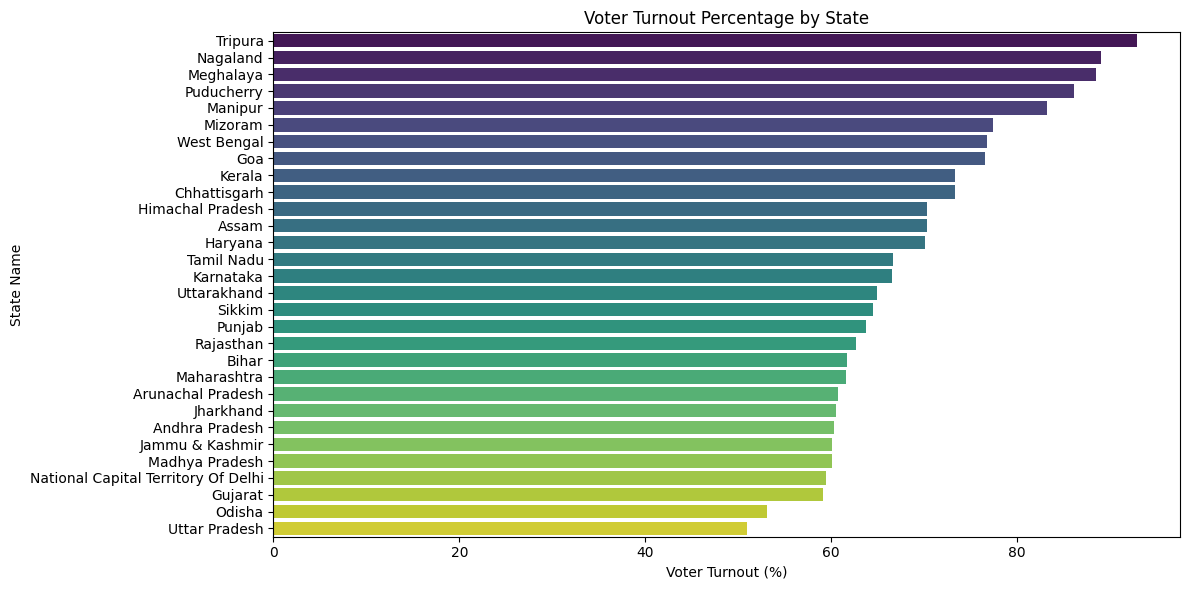

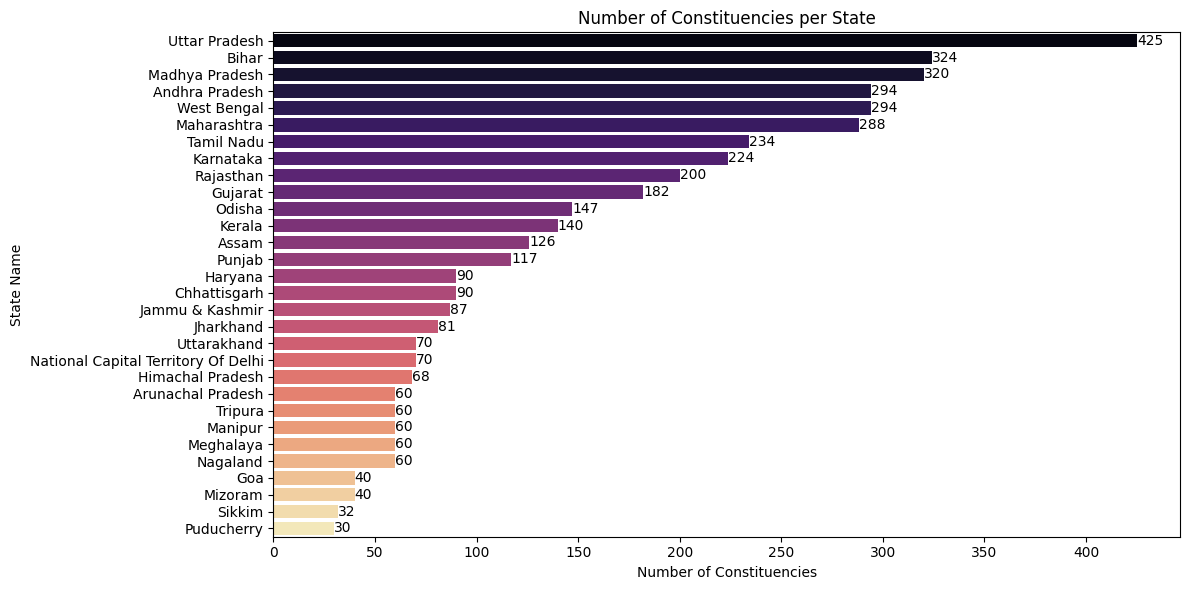

In [ ]:
#Vote turnout by state and number of constituencies per state
#step 1:get constituency -level totals(one row per seat)
constituency_turnout=(
    df_vidhan.groupby(['st_name','year','ac_no'])[['totvotpoll','electors']]
    .agg({'totvotpoll':'sum','electors':'max'})
    .reset_index()
)
#step 2:aggrate to state level
state_turnout=(
    constituency_turnout.groupby(['st_name'])[['totvotpoll','electors']]
    .sum()
    .assign(voter_turnout_percent=lambda x: (x['totvotpoll'] / x['electors']) * 100)
    .sort_values('voter_turnout_percent',ascending=False)['voter_turnout_percent']
)

#Ste3: number of constituencies per state
state_constituencies=df_vidhan.groupby('st_name')['ac_no'].nunique().sort_values(ascending=False)

#step 4:PLot
font_name='DejaVu Sans'

#PLot voter turnout by state
plt.figure(figsize=(12,6))
ax1=sns.barplot(
    x=state_turnout.values,
    y=state_turnout.index,
    hue=state_turnout.index,
    palette='viridis',
    legend=False
)

plt.title('Voter Turnout Percentage by State')  # ✅ FIXED TITLE
plt.xlabel('Voter Turnout (%)')                # ✅ FIXED LABEL
plt.ylabel('State Name', fontdict={'fontname': font_name})
plt.xticks(fontname=font_name)
plt.yticks(fontname=font_name)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
ax2 = sns.barplot(
    x=state_constituencies.values,
    y=state_constituencies.index,
    hue=state_constituencies.index,
    palette='magma',
    legend=False
)

plt.title('Number of Constituencies per State')
plt.xlabel('Number of Constituencies')
plt.ylabel('State Name',fontdict={'fontname':font_name})
plt.xticks(fontname=font_name)
plt.yticks(fontname=font_name)

for p in ax2.patches:
    ax2.annotate(
        f'{int(p.get_width())}',
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='left', va='center',
        fontsize=10,
        color='black',
    )

plt.tight_layout()
plt.show()

In [ ]:
#Making Unknow column
# df_lok['cand_sex'] = df_lok['cand_sex'].fillna('U').replace({'': 'U', 'Unknown': 'U', np.nan: 'U'})
# df_lok['cand_sex'] = df_lok['cand_sex'].where(df_lok['cand_sex'].isin(['M', 'F', 'U']), 'U')

#Step 1:count the candidate by gender
gender_participation=df_lok['cand_sex'].value_counts().reset_index()
gender_participation.columns=['Gender','Number_of_Candidates']

#STEP 2:
df_lok['rank']=df_lok.groupby(['year','st_name','pc_no'])['totvotpoll'].rank(method='first',ascending=False)
winner_lok=df_lok[df_lok['rank']==1].copy()

#step 3:
gender_wins=winner_lok['cand_sex'].value_counts().reset_index()
gender_wins.columns=['Gender','Number_of_Winners']

#step 4:gender wise winner
gender_analysis=pd.merge(
    gender_participation,
    gender_wins,
    on='Gender',
    how='left'
).fillna(0)

#STEP 5:COMPUTE WIN RATE
gender_analysis['Win_Rate (%)']=(
    gender_analysis['Number_of_Winners']/gender_analysis['Number_of_Candidates']
)*100

#Step 6:Display result
print("\n Gender-Based Participation and Performance (Lok Sabha)")
print(gender_analysis.sort_values(by='Number_of_Candidates',ascending=False))


 Gender-Based Participation and Performance (Lok Sabha)
  Gender  Number_of_Candidates  Number_of_Winners  Win_Rate (%)
0      M                 68885             5479.0      7.953836
1      F                  3648              455.0     12.472588
2      O                     6                0.0      0.000000


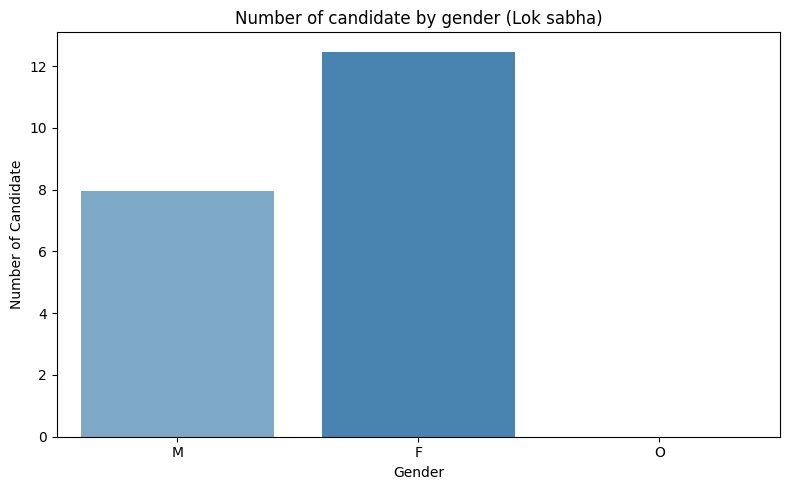

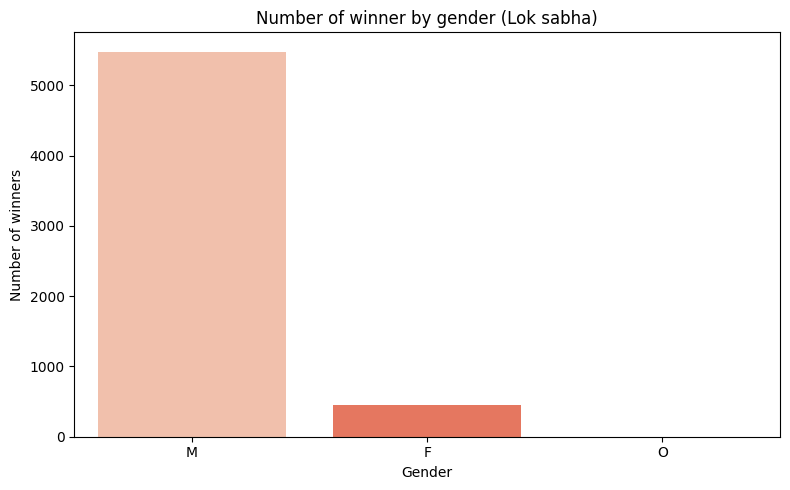

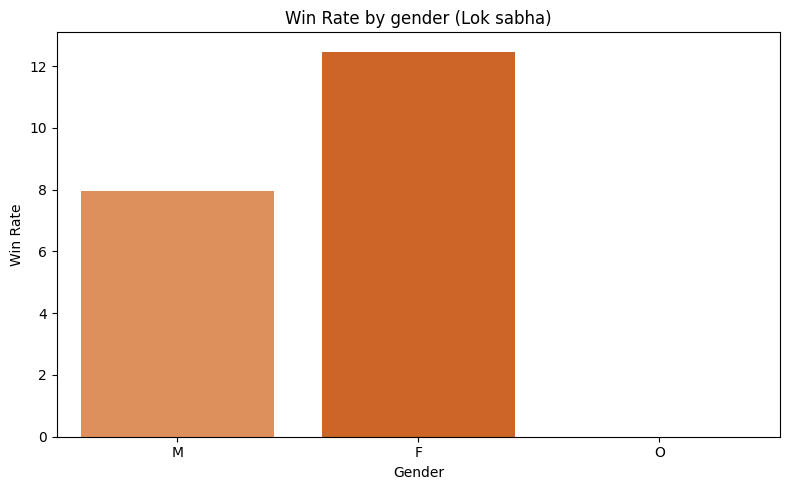

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=gender_analysis,
    x='Gender',
    y='Win_Rate (%)',
    hue='Gender',
    palette='Blues_d',
    legend=False
)
plt.title('Number of candidate by gender (Lok sabha)')
plt.ylabel('Number of Candidate')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

#plot 2 number of sinner by gender
plt.figure(figsize=(8,5))
sns.barplot(
    data=gender_analysis,
    x='Gender',
    y='Number_of_Winners',
    hue='Gender',
    palette='Reds',
    legend=False
)
plt.title('Number of winner by gender (Lok sabha)')
plt.ylabel('Number of winners')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

#plt 3: win rate by gender
plt.figure(figsize=(8,5))
sns.barplot(
    data=gender_analysis,
    x='Gender',
    y='Win_Rate (%)',
    hue='Gender',
    palette='Oranges_d',
    legend=False
)
plt.title('Win Rate by gender (Lok sabha)')
plt.ylabel('Win Rate')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()


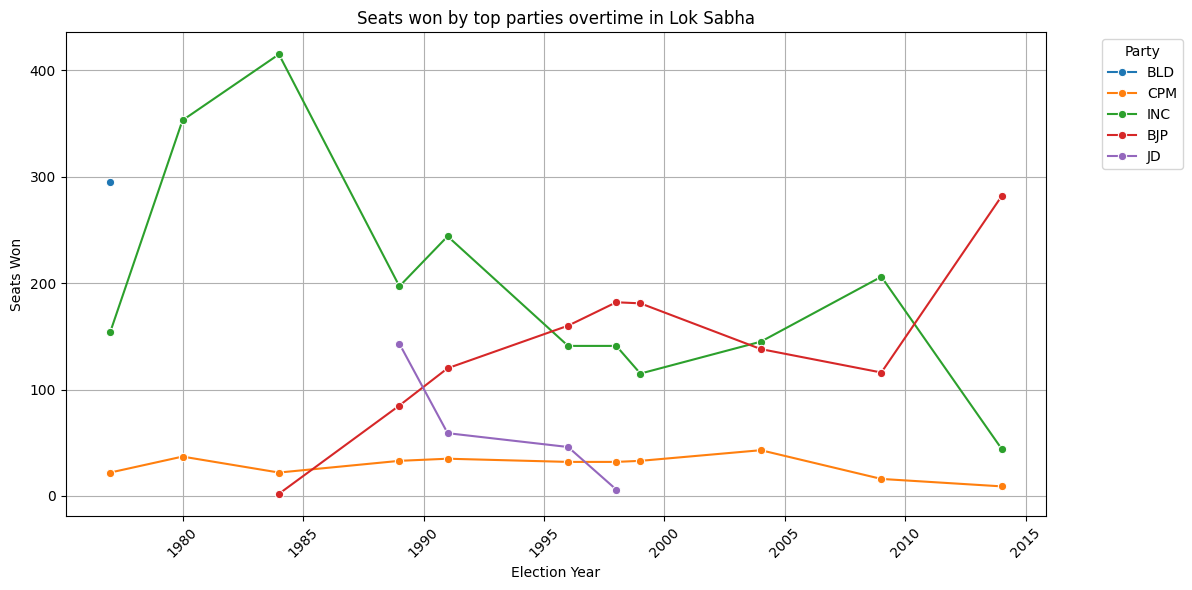

In [ ]:
#analyze part performnce in lok sabha
#step 1:get the winners from each seat
winner_idx=df_lok.groupby(['year','st_name','pc_no'])['totvotpoll'].idxmax()
winners=df_lok.loc[winner_idx].copy()

#step 2:count how many seats each party won per year
party_performance=winners.groupby(['year','partyabbre']).size().reset_index(name='seats_won')

#step 3: identify the top 5 parties with the most wins overall
top_parties=(
    party_performance
    .groupby('partyabbre')['seats_won']
    .sum()
    .nlargest(5)
    .index
    .tolist()
)

#step 4:filter to keep only top 5 parties performance
top_party_performance=party_performance[party_performance['partyabbre'].isin(top_parties)]

#step 5:plot
plt.figure(figsize=(12,6))
sns.lineplot(
    data=top_party_performance,
    x='year',
    y='seats_won',
    hue='partyabbre',
    marker='o'
)
plt.title('Seats won by top parties overtime in Lok Sabha')
plt.ylabel('Seats Won')
plt.xlabel('Election Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'legedn'

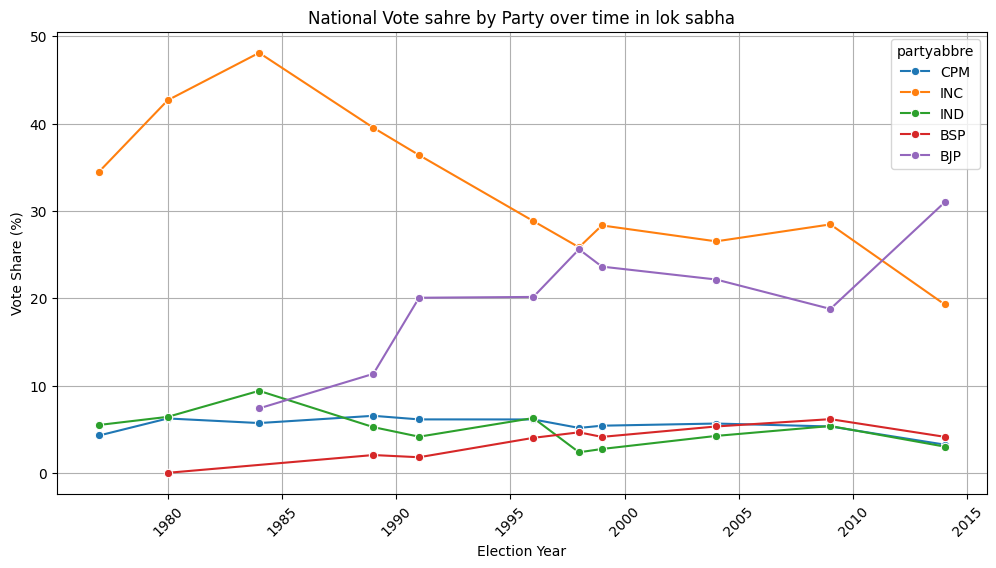

In [ ]:
#step 1:calculate the vote share by each party per year
party_votes=(
    df_lok.groupby(['year','partyabbre'])['totvotpoll']
    .sum()
    .reset_index()
    .rename(columns={'totvotpoll':'party_votes'})
)

#step 2:calculate the total vote cast in each year
total_votes=(
    df_lok.groupby('year')['totvotpoll']
    .sum()
    .reset_index()
    .rename(columns={'totvotpoll':'total_votes'})
)

#step 3:Merge both calculate votes
party_vote_share=pd.merge(party_votes,total_votes,on='year')
party_vote_share['vote_share_percent']=(party_vote_share['party_votes']/party_vote_share['total_votes'])*100

#step 4:Identify top 5 parties by total votes
top_parties=(
    party_vote_share.groupby('partyabbre')['party_votes']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

#step 5:keep top party share
top_vote_share=party_vote_share[party_vote_share['partyabbre'].isin(top_parties)]

#step 6: plot
plt.figure(figsize=(12,6))
sns.lineplot(
    data=top_vote_share,
    x='year',
    y='vote_share_percent',
    hue='partyabbre',
    marker='o'
)
plt.title('National Vote sahre by Party over time in lok sabha')
plt.xlabel('Election Year')
plt.ylabel('Vote Share (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legedn(title='Party',bbox_to_anchor=(1.05,1),loc='upper left')
plt.tight_layout()
plt.show()

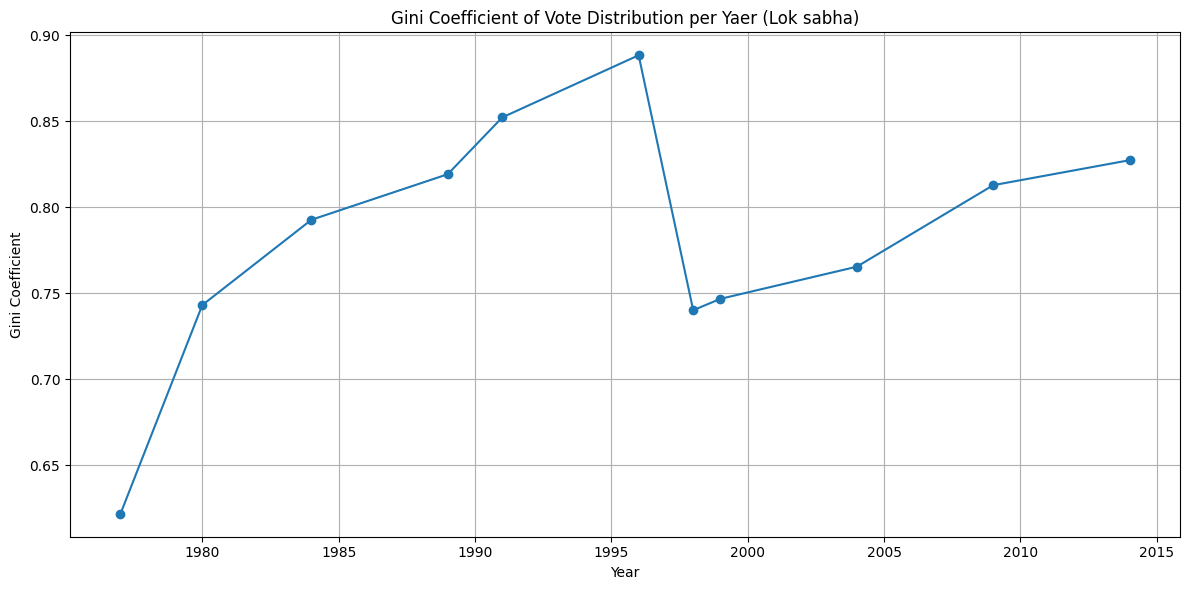

In [ ]:
#Gini Coefficient
#STEP 1:define a function to compute the gini coefficient
def gini(array):
  """Compute Gini Coefficient of a numpy array"""
  array=np.sort(array)
  n=len(array)
  cumulative=np.cumsum(array)
  return (2. *sum((np.arange(1,n+1)*array))/(n*cumulative[-1])-(n+1)/n)

#step 2:calculate gini for the dataset
votes=df_lok['totvotpoll'].values
gini_overall=gini(votes)

#step 3:calculate the gini by year
gini_yearwise=df_lok.groupby('year')['totvotpoll'].apply(lambda x:gini(x.values)).reset_index(name='gini_coefficient')

#step 4:plot the gini
plt.figure(figsize=(12,6))
plt.plot(gini_yearwise['year'],gini_yearwise['gini_coefficient'],marker='o',linestyle='-')
plt.title('Gini Coefficient of Vote Distribution per Yaer (Lok sabha)')
plt.xlabel('Year')
plt.ylabel('Gini Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()

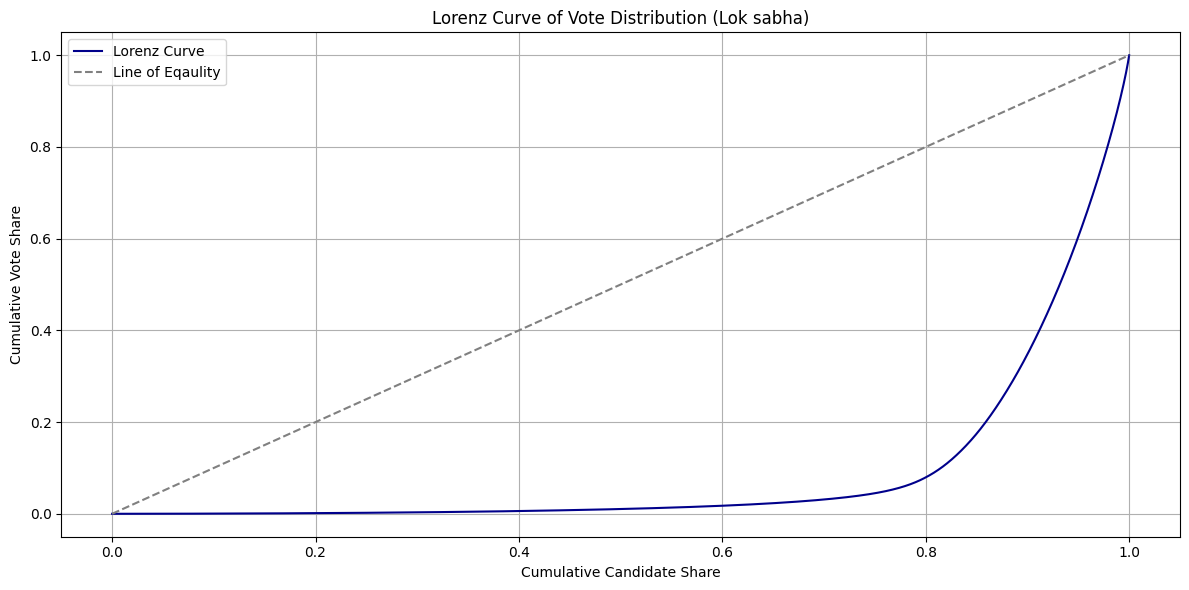

In [ ]:
#Lorenz curve
votes=df_lok['totvotpoll'].dropna()
votes=votes[votes>0].sort_values().values

#step 2:compute cumulative share of candidate and values
cum_votes=np.cumsum(votes)
cum_votes_precent=cum_votes/cum_votes[-1]
cum_candidate_precent=np.arange(1,len(votes)+1)/len(votes)

#step 3:compute lorenz
plt.figure(figsize=(12,6))
plt.plot(cum_candidate_precent,cum_votes_precent,label='Lorenz Curve',color='darkblue')
plt.plot([0,1],[0,1],linestyle='--',color='gray',label='Line of Eqaulity')

plt.title('Lorenz Curve of Vote Distribution (Lok sabha)')
plt.xlabel('Cumulative Candidate Share')
plt.ylabel('Cumulative Vote Share')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# Step 1: Clean and calculate vote share percent
df_lok['totvotpoll'] = df_lok['totvotpoll'].fillna(0)
df_lok['electors'] = df_lok['electors'].replace(0, np.nan)  # avoid division by zero
df_lok['vote_share_percent'] = (df_lok['totvotpoll'] / df_lok['electors']) * 100  # fix: multiply by 100 for percentage

# Step 2: Drop NaNs and extreme outliers (optional but recommended)
vote_shares = df_lok['vote_share_percent'].dropna()
vote_shares = vote_shares[vote_shares <= 100]  # keep valid percentage values

# Step 3: Compute skewness and kurtosis
vote_skewness = skew(vote_shares)
vote_kurtosis = kurtosis(vote_shares)

# Step 4: Display results
print(f"Skewness of Vote Share Distribution: {vote_skewness:.4f}")
print(f"Kurtosis of Vote Share Distribution: {vote_kurtosis:.4f}")

Skewness of Vote Share Distribution: 2.2187
Kurtosis of Vote Share Distribution: 4.0478


In [ ]:
#skewness and kurtosis by election year (year wise analysis)
summary=df_lok.groupby('year')['vote_share_percent'].apply(
    lambda x:pd.Series(
        {'Skewness':skew(x),'Kurtosis':kurtosis(x)}
    )
).reset_index()
print(summary)

    year   level_1  vote_share_percent
0   1977  Skewness            0.869836
1   1977  Kurtosis           -0.487988
2   1980  Skewness            1.733725
3   1980  Kurtosis            1.986911
4   1984  Skewness            1.914409
5   1984  Kurtosis            2.355135
6   1989  Skewness            2.136984
7   1989  Kurtosis            3.499113
8   1991  Skewness            2.810178
9   1991  Kurtosis            7.671801
10  1996  Skewness            3.636894
11  1996  Kurtosis           13.781332
12  1998  Skewness            1.389376
13  1998  Kurtosis            0.551309
14  1999  Skewness            1.446932
15  1999  Kurtosis            0.728694
16  2004  Skewness            1.884250
17  2004  Kurtosis            2.647415
18  2009  Skewness            2.530822
19  2009  Kurtosis            5.828738
20  2014  Skewness            2.496316
21  2014  Kurtosis            5.303818


In [ ]:
# Step 1: Total votes per party per year
party_votes = (
    df_lok.groupby(['year', 'partyabbre'])['totvotpoll']
    .sum()
    .reset_index(name='party_votes')
)

# Step 2: Total votes cast per year
total_votes = (
    df_lok.groupby('year')['totvotpoll']
    .sum()
    .reset_index(name='total_votes')
)

# Step 3: Merge and calculate vote share
party_votes = pd.merge(party_votes, total_votes, on='year')
party_votes['vote_share_percent'] = (party_votes['party_votes'] / party_votes['total_votes']) * 100

# Step 4: Filter parties with votes in at least 3 years
party_years = party_votes['partyabbre'].value_counts()
eligible_parties = party_years[party_years >= 3].index
filtered = party_votes[party_votes['partyabbre'].isin(eligible_parties)]

# Step 5: Group by party and compute skewness & kurtosis
summary_stats = filtered.groupby('partyabbre')['vote_share_percent'].agg(
    Skewness=lambda x: skew(x),
    Kurtosis=lambda x: kurtosis(x)
).reset_index().sort_values('Skewness', ascending=False)

# Step 6: Display results
print("Most Right-Skewed Parties:")
print(summary_stats.head())

print("\nMost Left-Skewed Parties:")
print(summary_stats.tail())

Most Right-Skewed Parties:
    partyabbre  Skewness  Kurtosis
162     SAD(M)  2.174604  2.915587
172        SSD  2.108498  3.223395
96          JP  1.778669  1.181883
5         ABJS  1.589929  0.862739
90         JKP  1.561140  1.392361

Most Left-Skewed Parties:
    partyabbre  Skewness  Kurtosis
79        INLD -0.982702 -0.772453
161        SAD -1.027178  1.301219
57         CPM -1.145262  0.578997
117        MRP -1.177393 -0.260929
170         SP -1.407391  1.033443


/tmp/ipython-input-46-680218486.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


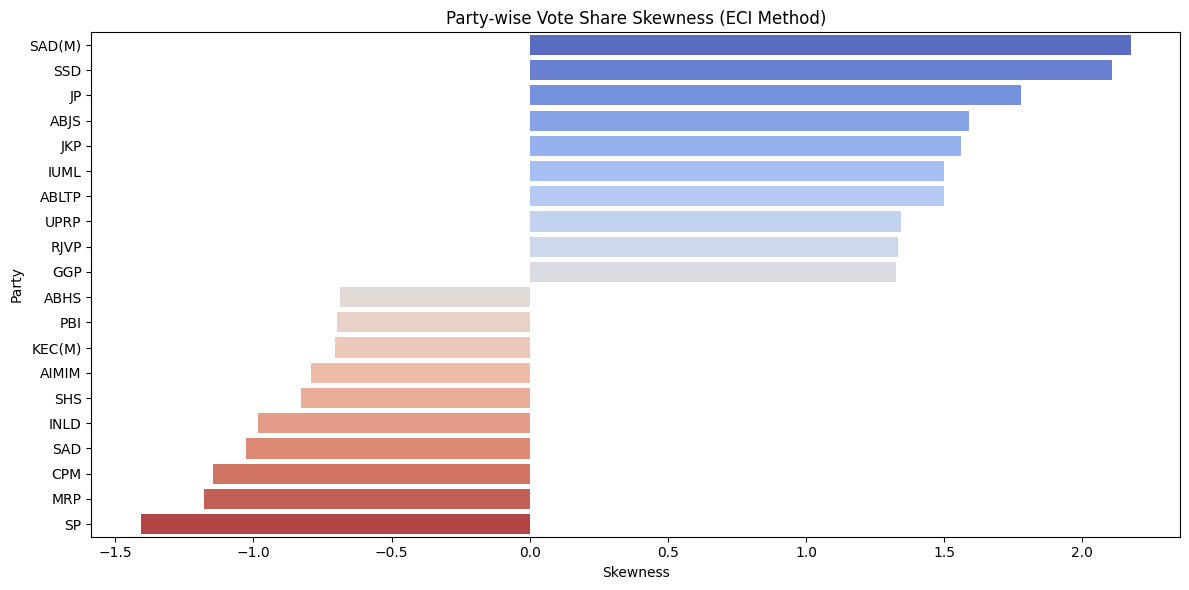

/tmp/ipython-input-46-680218486.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


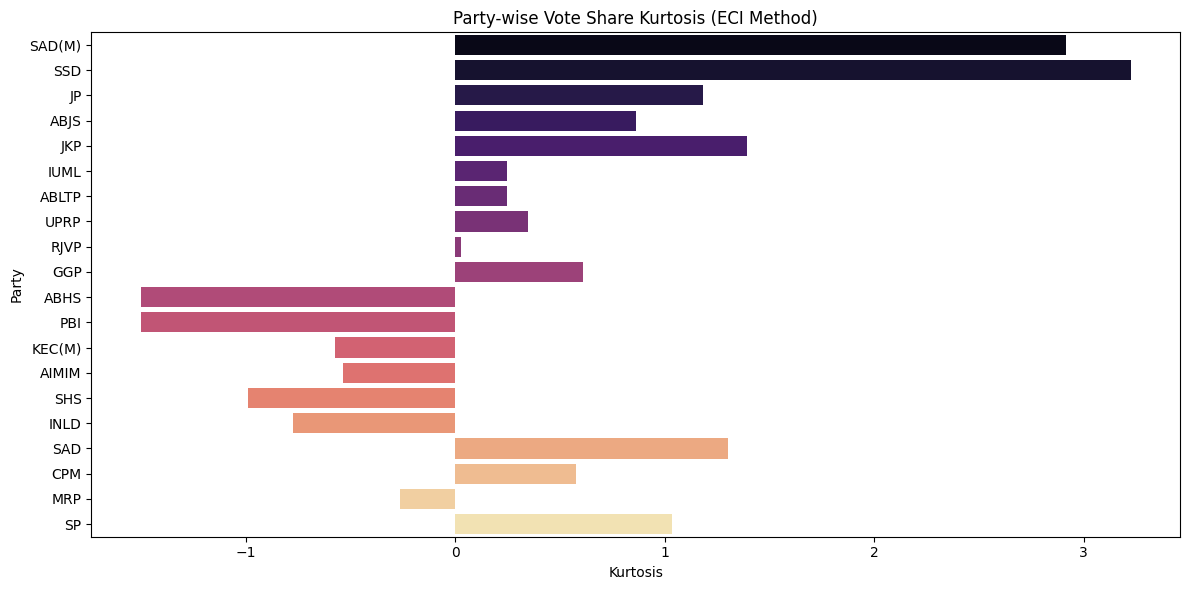

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 10 and bottom 10 parties
plot_data = pd.concat([summary_stats.head(10), summary_stats.tail(10)])

# Plot 1: Skewness
plt.figure(figsize=(12, 6))
sns.barplot(
    data=plot_data,
    x="Skewness",
    y="partyabbre",
    palette="coolwarm"
)
plt.title("Party-wise Vote Share Skewness (ECI Method)")
plt.xlabel("Skewness")
plt.ylabel("Party")
plt.tight_layout()
plt.show()

# Plot 2: Kurtosis
plt.figure(figsize=(12, 6))
sns.barplot(
    data=plot_data,
    x="Kurtosis",
    y="partyabbre",
    palette="magma"
)
plt.title("Party-wise Vote Share Kurtosis (ECI Method)")
plt.xlabel("Kurtosis")
plt.ylabel("Party")
plt.tight_layout()
plt.show()

ANOVA F-statistic: 16.1078
P-value: 5.6094e-36
✅ BJP's vote shares significantly differ across states.


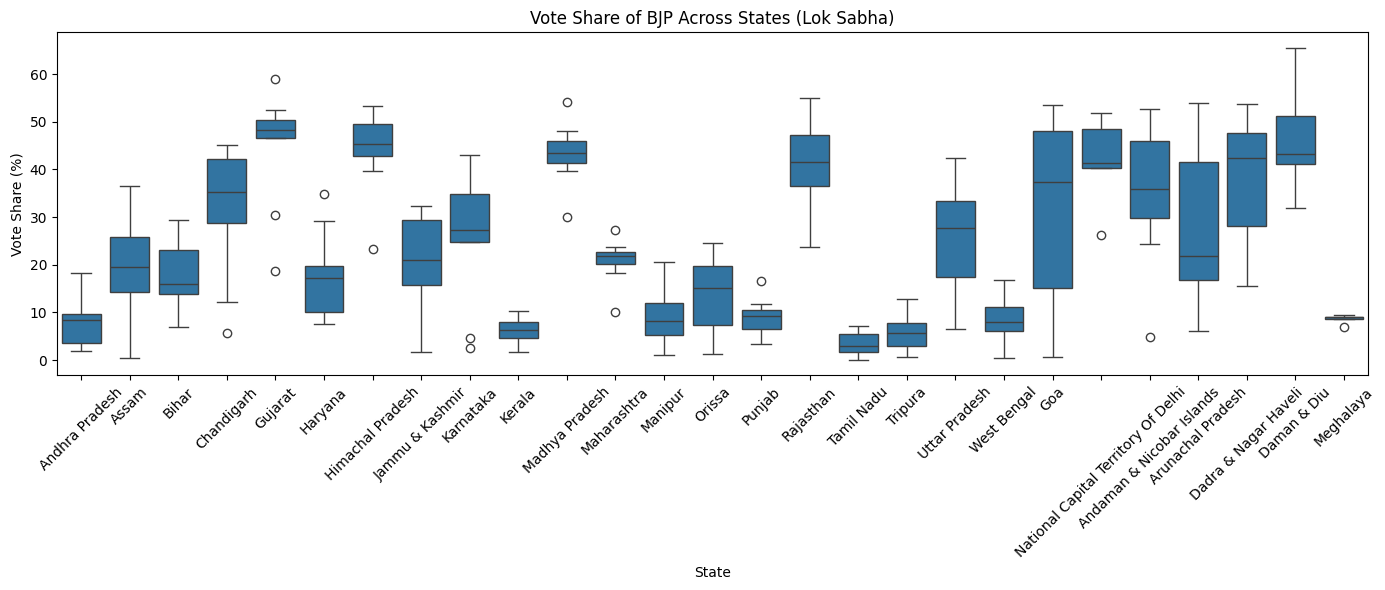

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean data
df_lok['totvotpoll'] = df_lok['totvotpoll'].fillna(0)

# Step 2: Choose a party
target_party = 'BJP'  # Change to 'INC', 'AAP', etc. as needed

# Step 3: Total votes for the party per state per year
party_votes = (
    df_lok[df_lok['partyabbre'] == target_party]
    .groupby(['year', 'st_name'])['totvotpoll']
    .sum()
    .reset_index(name='party_votes')
)

# Step 4: Total votes polled in each state per year
total_votes = (
    df_lok.groupby(['year', 'st_name'])['totvotpoll']
    .sum()
    .reset_index(name='total_votes')
)

# Step 5: Merge and calculate ECI-style vote share
merged = pd.merge(party_votes, total_votes, on=['year', 'st_name'])
merged['vote_share_percent'] = (merged['party_votes'] / merged['total_votes']) * 100

# Step 6: Filter out states with too few observations (e.g., < 4 elections)
state_counts = merged['st_name'].value_counts()
eligible_states = state_counts[state_counts > 3].index
filtered = merged[merged['st_name'].isin(eligible_states)]

# Step 7: Group vote shares by state
grouped_data = filtered.groupby('st_name')['vote_share_percent'].apply(list)

# Step 8: Run ANOVA
f_stat, p_value = f_oneway(*grouped_data.values)

# Step 9: Results
print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print(f"✅ {target_party}'s vote shares significantly differ across states.")
else:
    print(f"❌ No significant difference in {target_party}'s vote shares across states.")

# Step 10: Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered, x='st_name', y='vote_share_percent')
plt.title(f'Vote Share of {target_party} Across States (Lok Sabha)')
plt.xlabel('State')
plt.ylabel('Vote Share (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_lok.columns

Index(['st_name', 'year', 'pc_no', 'pc_name', 'pc_type', 'cand_name',
       'cand_sex', 'partyname', 'partyabbre', 'totvotpoll', 'electors', 'rank',
       'vote_share_percent'],
      dtype='object')

In [ ]:
df_vidhan.columns

Index(['st_name', 'year', 'ac_no', 'ac_name', 'ac_type', 'cand_name',
       'cand_sex', 'partyname', 'partyabbre', 'totvotpoll', 'electors',
       'vote_share_percent'],
      dtype='object')

T-statistic: 0.5104
P-value: 6.1365e-01
❌ No significant difference in vote shares.


/tmp/ipython-input-51-3059482946.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered, x='group', y='vote_share_percent', palette='Set2')


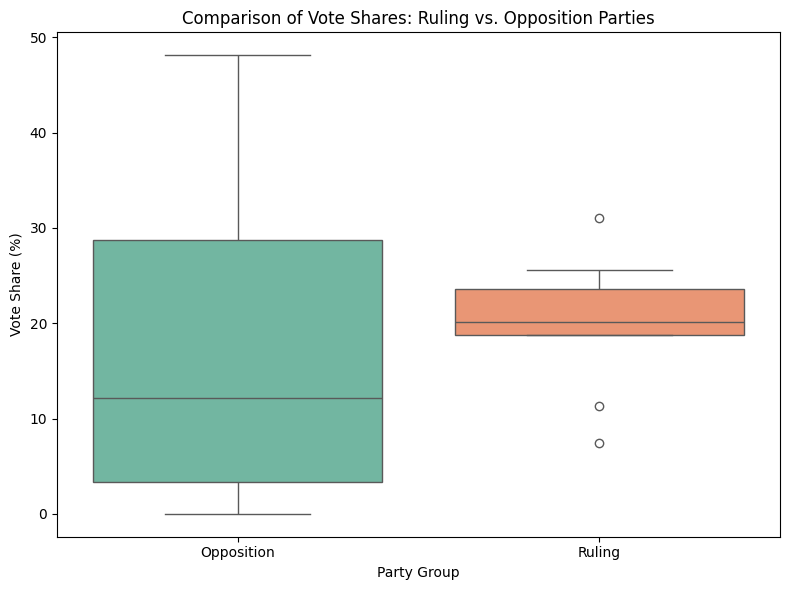

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define ruling and opposition parties
ruling_party = 'BJP'
opposition_parties = ['INC', 'DHK', 'SP', 'DSP', 'AITC']  # Add more if needed

# Step 2: Clean vote data
df_lok['totvotpoll'] = df_lok['totvotpoll'].fillna(0)

# Step 3: Total votes for each party per year
party_votes = (
    df_lok.groupby(['year', 'partyabbre'])['totvotpoll']
    .sum()
    .reset_index(name='party_votes')
)

# Step 4: Total national votes per year
total_votes = (
    df_lok.groupby('year')['totvotpoll']
    .sum()
    .reset_index(name='total_votes')
)

# Step 5: Merge to compute ECI-style vote share
party_votes = pd.merge(party_votes, total_votes, on='year')
party_votes['vote_share_percent'] = (party_votes['party_votes'] / party_votes['total_votes']) * 100

# Step 6: Create ruling vs opposition group column
party_votes['group'] = party_votes['partyabbre'].apply(
    lambda x: 'Ruling' if x == ruling_party else ('Opposition' if x in opposition_parties else 'Other')
)

# Step 7: Filter to just ruling vs opposition
filtered = party_votes[party_votes['group'].isin(['Ruling', 'Opposition'])]

# Step 8: Prepare data for t-test
ruling_shares = filtered[filtered['group'] == 'Ruling']['vote_share_percent']
opposition_shares = filtered[filtered['group'] == 'Opposition']['vote_share_percent']

# Step 9: Run t-test
t_stat, p_value = ttest_ind(ruling_shares, opposition_shares, equal_var=False)

# Step 10: Display result
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("✅ Significant difference in ECI-style vote shares between ruling and opposition parties.")
else:
    print("❌ No significant difference in vote shares.")

# Step 11: Boxplot visualization
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered, x='group', y='vote_share_percent', palette='Set2')
plt.title('Comparison of Vote Shares: Ruling vs. Opposition Parties')
plt.xlabel('Party Group')
plt.ylabel('Vote Share (%)')
plt.tight_layout()
plt.show()

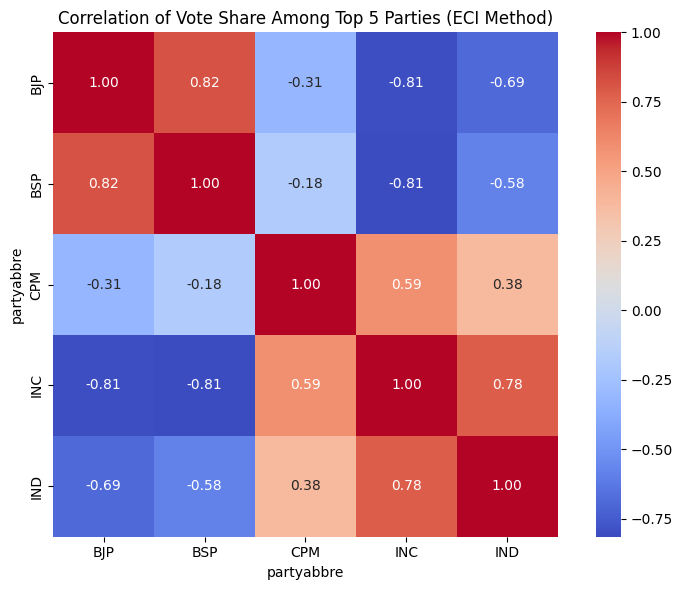

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Total votes per party per year
party_votes = (
    df_lok.groupby(['year', 'partyabbre'])['totvotpoll']
    .sum()
    .reset_index(name='party_votes')
)

# Step 2: Total national votes per year
total_votes = (
    df_lok.groupby('year')['totvotpoll']
    .sum()
    .reset_index(name='total_votes')
)

# Step 3: Merge and calculate ECI-style vote share
vote_share_df = pd.merge(party_votes, total_votes, on='year')
vote_share_df['vote_share_percent'] = (vote_share_df['party_votes'] / vote_share_df['total_votes']) * 100

# Step 4: Set top 5 parties by total votes across all years
top5_parties = (
    vote_share_df.groupby('partyabbre')['party_votes']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Step 5: Filter to top 5 parties only
top5_df = vote_share_df[vote_share_df['partyabbre'].isin(top5_parties)]

# Step 6: Pivot for correlation matrix (years as rows, parties as columns)
pivot_df = top5_df.pivot(index='year', columns='partyabbre', values='vote_share_percent').fillna(0)

# Step 7: Compute correlation matrix
correlation_matrix = pivot_df.corr()

# Step 8: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation of Vote Share Among Top 5 Parties (ECI Method)")
plt.tight_layout()
plt.show()

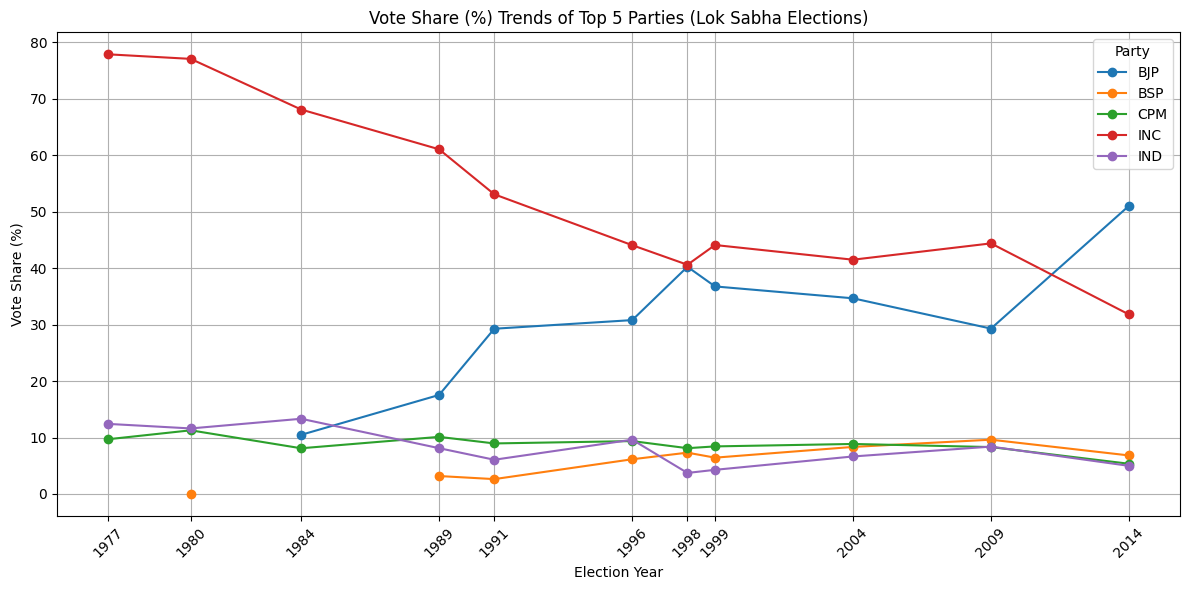

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_lok is already loaded with Lok Sabha election data

# Step a: Identify Top 5 Parties by Total Votes
total_votes_party = df_lok.groupby('partyabbre')['totvotpoll'].sum().sort_values(ascending=False)
top_5_parties = total_votes_party.head(5).index.tolist()

# Step b: Filter Data for Top 5 Parties
df_top5 = df_lok[df_lok['partyabbre'].isin(top_5_parties)]

# Step c.i: Compute Vote Share Per Year for Each Party
# Total votes per year
total_votes_per_year = df_top5.groupby('year')['totvotpoll'].sum()

# Total votes per party per year
party_year_votes = df_top5.groupby(['year', 'partyabbre'])['totvotpoll'].sum().reset_index()

# Calculate vote share
party_year_votes['vote_share'] = party_year_votes.apply(
    lambda row: (row['totvotpoll'] / total_votes_per_year[row['year']]) * 100, axis=1
)

# Step c.ii: Pivot for Plotting
pivot_df = party_year_votes.pivot(index='year', columns='partyabbre', values='vote_share')
pivot_df = pivot_df.sort_index()

# Step d: Plot Line Chart
plt.figure(figsize=(12, 6))

for party in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[party], marker='o', label=party)

plt.title("Vote Share (%) Trends of Top 5 Parties (Lok Sabha Elections)")
plt.xlabel("Election Year")
plt.ylabel("Vote Share (%)")
plt.legend(title="Party")
plt.grid(True)
plt.xticks(pivot_df.index, rotation=45)
plt.tight_layout()
plt.show()


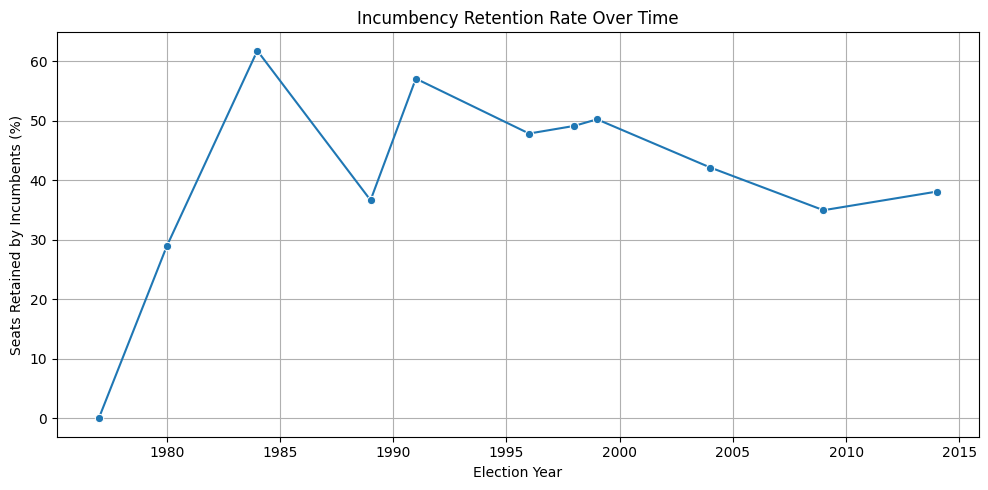

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Rank candidates per seat
df_lok['rank'] = df_lok.groupby(['year', 'st_name', 'pc_no'])['totvotpoll'].rank(method='first', ascending=False)

# Step 2: Filter winners (rank 1)
winners = df_lok[df_lok['rank'] == 1].copy()

# Step 3: Sort by year and seat to match previous winner
winners.sort_values(by=['st_name', 'pc_no', 'year'], inplace=True)
winners['prev_party'] = winners.groupby(['st_name', 'pc_no'])['partyabbre'].shift()

# Step 4: Compare to check if party retained the seat
winners['retained'] = winners['partyabbre'] == winners['prev_party']

# Step 5: Calculate % of seats retained each year
incumbency = winners.groupby('year')['retained'].mean().reset_index()
incumbency['retained'] = incumbency['retained'] * 100  # convert to percentage

# Step 6: Plot incumbency retention over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=incumbency, x='year', y='retained', marker='o')
plt.title('Incumbency Retention Rate Over Time')
plt.ylabel('Seats Retained by Incumbents (%)')
plt.xlabel('Election Year')
plt.grid(True)
plt.tight_layout()
plt.show()

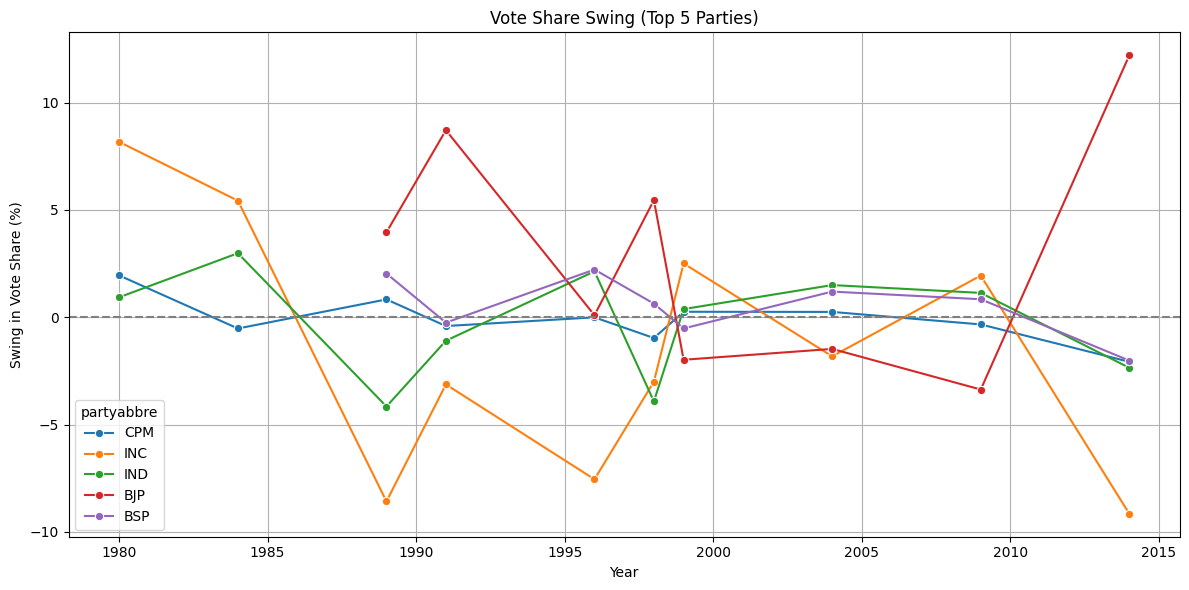

In [ ]:
# Focus on top parties only
swing_df = vote_share_df[vote_share_df['partyabbre'].isin(top5_parties)].copy()

# Calculate year-over-year change (swing)
swing_df['prev_share'] = swing_df.groupby('partyabbre')['vote_share_percent'].shift()
swing_df['swing'] = swing_df['vote_share_percent'] - swing_df['prev_share']

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=swing_df.dropna(), x='year', y='swing', hue='partyabbre', marker='o')
plt.axhline(0, color="gray", linestyle='--')

plt.title('Vote Share Swing (Top 5 Parties)')
plt.xlabel('Year')
plt.ylabel('Swing in Vote Share (%)')
plt.grid(True)
plt.tight_layout()
plt.show()